#### Exploração inicial da base de dados

In [93]:
import pandas as pd

In [94]:
df = pd.read_csv(r'C:\Users\P001571\Downloads\ds\base_fraude\fraud_dataset_example.csv')

In [95]:
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [96]:
df.shape

(101613, 11)

In [97]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [98]:
df = df[['isFraud', 'isFlaggedFraud','step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]

In [99]:
df.head()

isFraud  isFlaggedFraud  step      type    amount     nameOrig  \
0        0               0     1   PAYMENT   9839.64  C1231006815   
1        0               0     1   PAYMENT   1864.28  C1666544295   
2        1               0     1  TRANSFER    181.00  C1305486145   
3        1               0     1  CASH_OUT    181.00   C840083671   
4        0               0     1   PAYMENT  11668.14  C2048537720   

   oldbalanceOrg  newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  
0       170136.0       160296.36  M1979787155             0.0             0.0  
1        21249.0        19384.72  M2044282225             0.0             0.0  
2          181.0            0.00   C553264065             0.0             0.0  
3          181.0            0.00    C38997010         21182.0             0.0  
4        41554.0        29885.86  M1230701703             0.0             0.0

In [100]:
## Dicionário para renomeação das colunas

colunas = {
    'isFraud': 'fraude',
    'isFlaggedFraud':'super_fraude',
    'step':'tempo',
    'type':'tipo',
    'amount':'valor',
    'nameOrig':'cliente1',
    'oldbalanceOrg':'saldo_inicial_c1',
    'newbalanceOrig':'novo_saldo_c1',
    'nameDest':'cliente2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'novo_saldo_c2',
}

In [101]:
df = df.rename(columns = colunas)

In [102]:
df.head()

fraude  super_fraude  tempo      tipo     valor     cliente1  \
0       0             0      1   PAYMENT   9839.64  C1231006815   
1       0             0      1   PAYMENT   1864.28  C1666544295   
2       1             0      1  TRANSFER    181.00  C1305486145   
3       1             0      1  CASH_OUT    181.00   C840083671   
4       0             0      1   PAYMENT  11668.14  C2048537720   

   saldo_inicial_c1  novo_saldo_c1     cliente2  saldo_inicial_c2  \
0          170136.0      160296.36  M1979787155               0.0   
1           21249.0       19384.72  M2044282225               0.0   
2             181.0           0.00   C553264065               0.0   
3             181.0           0.00    C38997010           21182.0   
4           41554.0       29885.86  M1230701703               0.0   

   novo_saldo_c2  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0

In [103]:
df.describe()

fraude  super_fraude          tempo         valor  \
count  101613.000000      101613.0  101613.000000  1.016130e+05   
mean        0.001142           0.0       8.523457  1.740901e+05   
std         0.033768           0.0       1.820681  3.450199e+05   
min         0.000000           0.0       1.000000  3.200000e-01   
25%         0.000000           0.0       8.000000  1.001659e+04   
50%         0.000000           0.0       9.000000  5.338541e+04   
75%         0.000000           0.0      10.000000  2.124984e+05   
max         1.000000           0.0      10.000000  1.000000e+07   

       saldo_inicial_c1  novo_saldo_c1  saldo_inicial_c2  novo_saldo_c2  
count      1.016130e+05   1.016130e+05      1.016130e+05   1.016130e+05  
mean       9.071753e+05   9.234992e+05      8.810428e+05   1.183998e+06  
std        2.829575e+06   2.867319e+06      2.399949e+06   2.797761e+06  
min        0.000000e+00   0.000000e+00      0.000000e+00   0.000000e+00  
25%        0.000000e+00   0.000000e+00      0.000000e+00   0.000000e+00  
50%        2.019047e+04   0.000000e+00      2.105800e+04   5.178343e+04  
75%        1.947150e+05   2.192178e+05      5.919217e+05   1.063122e+06  
max        3.893942e+07   3.894623e+07      3.400874e+07   3.894623e+07

In [104]:
df.describe().T

count          mean           std   min       25%  \
fraude            101613.0  1.141586e-03  3.376824e-02  0.00      0.00   
super_fraude      101613.0  0.000000e+00  0.000000e+00  0.00      0.00   
tempo             101613.0  8.523457e+00  1.820681e+00  1.00      8.00   
valor             101613.0  1.740901e+05  3.450199e+05  0.32  10016.59   
saldo_inicial_c1  101613.0  9.071753e+05  2.829575e+06  0.00      0.00   
novo_saldo_c1     101613.0  9.234992e+05  2.867319e+06  0.00      0.00   
saldo_inicial_c2  101613.0  8.810428e+05  2.399949e+06  0.00      0.00   
novo_saldo_c2     101613.0  1.183998e+06  2.797761e+06  0.00      0.00   

                       50%         75%          max  
fraude                0.00        0.00         1.00  
super_fraude          0.00        0.00         0.00  
tempo                 9.00       10.00        10.00  
valor             53385.41   212498.40  10000000.00  
saldo_inicial_c1  20190.47   194715.00  38939424.03  
novo_saldo_c1         0.00   219217.76  38946233.02  
saldo_inicial_c2  21058.00   591921.70  34008736.98  
novo_saldo_c2     51783.43  1063121.64  38946233.02

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fraude            101613 non-null  int64  
 1   super_fraude      101613 non-null  int64  
 2   tempo             101613 non-null  int64  
 3   tipo              101613 non-null  object 
 4   valor             101613 non-null  float64
 5   cliente1          101613 non-null  object 
 6   saldo_inicial_c1  101613 non-null  float64
 7   novo_saldo_c1     101613 non-null  float64
 8   cliente2          101613 non-null  object 
 9   saldo_inicial_c2  101613 non-null  float64
 10  novo_saldo_c2     101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [106]:
df.groupby('fraude').tempo.count()

fraude
0    101497
1       116
Name: tempo, dtype: int64

In [107]:
df.isnull().values.any()

False

In [108]:
## Biblioteca que ajuda muito com a sumarização e análise da estruturação dos dados

from ydata_profiling import ProfileReport

ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [109]:
df = pd.get_dummies(data = df, columns = ['tipo'])

In [110]:
df.head()

fraude  super_fraude  tempo     valor     cliente1  saldo_inicial_c1  \
0       0             0      1   9839.64  C1231006815          170136.0   
1       0             0      1   1864.28  C1666544295           21249.0   
2       1             0      1    181.00  C1305486145             181.0   
3       1             0      1    181.00   C840083671             181.0   
4       0             0      1  11668.14  C2048537720           41554.0   

   novo_saldo_c1     cliente2  saldo_inicial_c2  novo_saldo_c2  tipo_CASH_IN  \
0      160296.36  M1979787155               0.0            0.0         False   
1       19384.72  M2044282225               0.0            0.0         False   
2           0.00   C553264065               0.0            0.0         False   
3           0.00    C38997010           21182.0            0.0         False   
4       29885.86  M1230701703               0.0            0.0         False   

   tipo_CASH_OUT  tipo_DEBIT  tipo_PAYMENT  tipo_TRANSFER  
0          False       False          True          False  
1          False       False          True          False  
2          False       False         False           True  
3           True       False         False          False  
4          False       False          True          False

In [111]:
df = df.drop(columns=['super_fraude', 'cliente1', 'cliente2'], axis = 1)

In [112]:
df.head()

fraude  tempo     valor  saldo_inicial_c1  novo_saldo_c1  saldo_inicial_c2  \
0       0      1   9839.64          170136.0      160296.36               0.0   
1       0      1   1864.28           21249.0       19384.72               0.0   
2       1      1    181.00             181.0           0.00               0.0   
3       1      1    181.00             181.0           0.00           21182.0   
4       0      1  11668.14           41554.0       29885.86               0.0   

   novo_saldo_c2  tipo_CASH_IN  tipo_CASH_OUT  tipo_DEBIT  tipo_PAYMENT  \
0            0.0         False          False       False          True   
1            0.0         False          False       False          True   
2            0.0         False          False       False         False   
3            0.0         False           True       False         False   
4            0.0         False          False       False          True   

   tipo_TRANSFER  
0          False  
1          False  
2           True  
3          False  
4          False


#### Regressão logística

In [113]:
x = df.drop('fraude',axis = 1)
y = df['fraude']

In [114]:
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = SEED)

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


lr = LogisticRegression(max_iter = 1000, random_state = SEED)

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("Acurácia: ",metrics.accuracy_score(y_test, y_pred))
print("Precisão: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test, y_pred)) 
print("F1: ",metrics.f1_score(y_test, y_pred))

Acurácia:  0.9990552668871044
Precisão:  0.3333333333333333
Recall:  0.043478260869565216
F1:  0.07692307692307693


In [116]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline


cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)

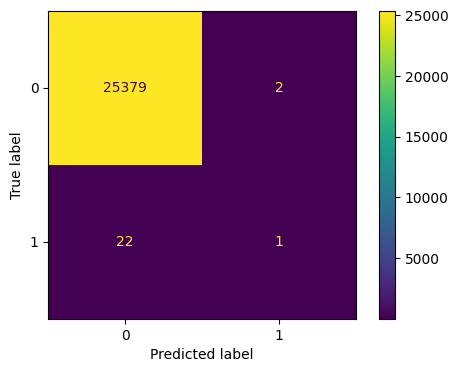

In [117]:
disp.plot()

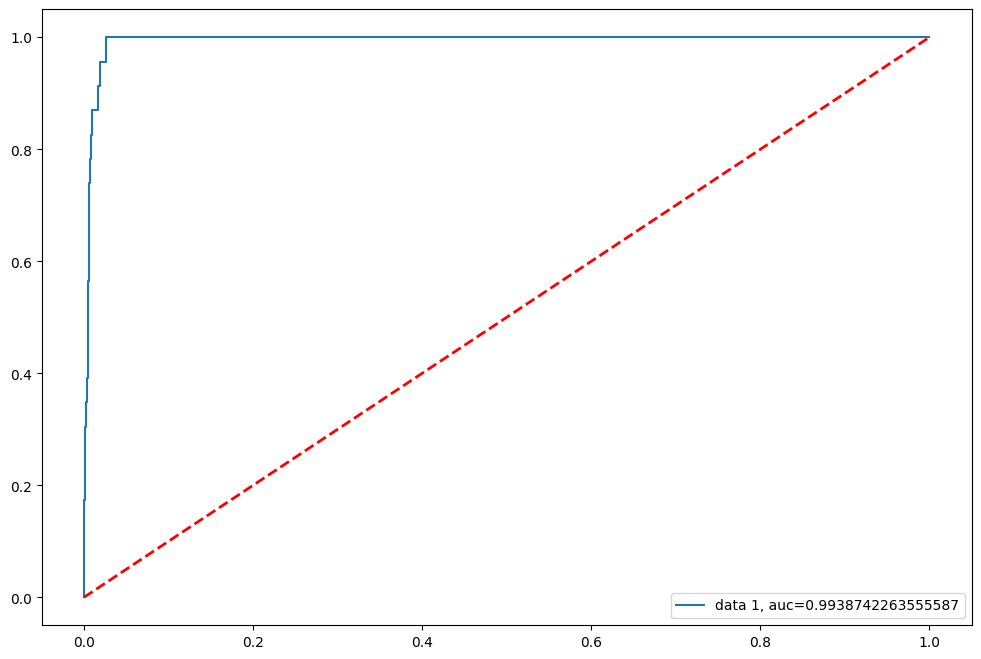

In [118]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12.,8.)
plt.plot(fpr, tpr, label = 'data 1, auc='+str(auc))
plt.plot([0,1], [0,1], color = 'red', lw=2, linestyle='--')
plt.legend(loc=4)

#### Balanceamento das classes

In [119]:
## método undersampling (cortar a classe majoritária até ela ficar do tamanho da classe menor)

## método oversampling (copiar dados da classe minoritária até ficar do tamanho da classe majoritária) - recomendado nesse caso


#pip install -U imbalanced-learn  # Técnica SMOTE (KNN k Nearest Neighbor)

In [120]:
from imblearn.over_sampling import SMOTE
import numpy as np

smote = SMOTE(random_state=42)

In [121]:
x = df.drop('fraude', axis= 1)
y = df['fraude']

In [122]:
x_resampled, y_resampled = smote.fit_resample(x,y)

In [123]:
df_balanced = pd.concat([y_resampled, x_resampled], axis = 1)
df_balanced

fraude  tempo          valor  saldo_inicial_c1  novo_saldo_c1  \
0            0      1    9839.640000     170136.000000      160296.36   
1            0      1    1864.280000      21249.000000       19384.72   
2            1      1     181.000000        181.000000           0.00   
3            1      1     181.000000        181.000000           0.00   
4            0      1   11668.140000      41554.000000       29885.86   
...        ...    ...            ...               ...            ...   
202989       1      5   17608.962863      17608.962863           0.00   
202990       1      7   12116.291013      12116.291013           0.00   
202991       1      1  231612.880715     231612.880715           0.00   
202992       1      9  547325.144758     547325.144758           0.00   
202993       1      4  159298.594420     159298.594420           0.00   

        saldo_inicial_c2  novo_saldo_c2  tipo_CASH_IN  tipo_CASH_OUT  \
0               0.000000       0.000000         False          False   
1               0.000000       0.000000         False          False   
2               0.000000       0.000000         False          False   
3           21182.000000       0.000000         False           True   
4               0.000000       0.000000         False          False   
...                  ...            ...           ...            ...   
202989          0.000000       0.000000         False          False   
202990          0.000000       0.000000         False          False   
202991       1945.589357    9370.603471         False           True   
202992          0.000000       0.000000         False          False   
202993          0.000000       0.000000         False          False   

        tipo_DEBIT  tipo_PAYMENT  tipo_TRANSFER  
0            False          True          False  
1            False          True          False  
2            False         False           True  
3            False         False          False  
4            False          True          False  
...            ...           ...            ...  
202989       False         False           True  
202990       False         False           True  
202991       False         False           True  
202992       False         False           True  
202993       False         False           True  

[202994 rows x 12 columns]

In [124]:
df_balanced.groupby('fraude').tempo.count()

fraude
0    101497
1    101497
Name: tempo, dtype: int64

In [125]:
## novo teste do lr (regressão logística)

x = df_balanced.iloc[:, 1:].values
y = df_balanced.iloc[:, 0].values

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = SEED)

In [127]:
lr = LogisticRegression(max_iter = 1000, random_state = SEED)

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("Acurácia: ",metrics.accuracy_score(y_test, y_pred))
print("Precisão: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test, y_pred)) 
print("F1: ",metrics.f1_score(y_test, y_pred))

Acurácia:  0.965437742615618
Precisão:  0.96745679403837
Recall:  0.9631807419100237
F1:  0.9653140325897801


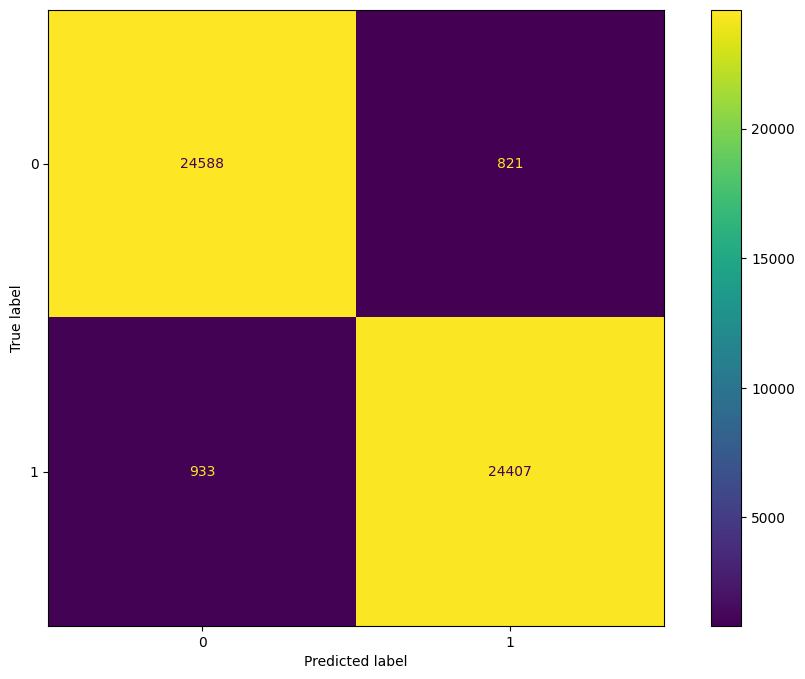

In [128]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot()

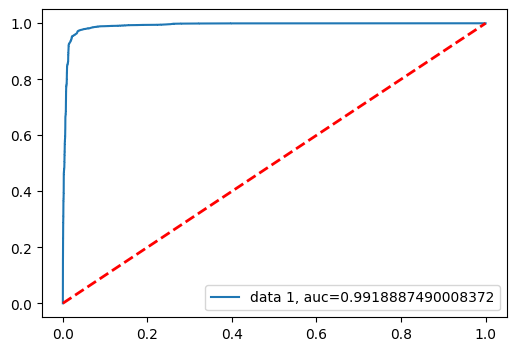

In [129]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (6.,4.)
plt.plot(fpr, tpr, label = 'data 1, auc='+str(auc))
plt.plot([0,1], [0,1], color = 'red', lw=2, linestyle='--')
plt.legend(loc=4)

In [130]:
## hipóteses

ProfileReport(df_balanced)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- tipo_PAYMENT é o que a pessoa utiliza como padrão e a fraude ocorre por meio do tipo_TRANSFER

- o cliente pode fazer os pagamentos durante determinado período do dia, como por exemplo durante a manhã, e a fraude ocorre em um período diferente, por exemplo de madrugada

- o cliente pode fazer o pagamento começo do mês e a fraude ocorrer fim do mês

### Outros modelos para comparação

##### Árvore de decisão

In [131]:
from sklearn.tree import DecisionTreeClassifier

In [132]:
dt = DecisionTreeClassifier(max_depth=5, random_state=SEED)

In [133]:
model = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print("Acurácia: ",metrics.accuracy_score(y_test, y_pred))
print("Precisão: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test, y_pred)) 
print("F1: ",metrics.f1_score(y_test, y_pred))

Acurácia:  0.9595065912628821
Precisão:  0.9379678742053192
Recall:  0.9839779005524862
F1:  0.9604221635883905


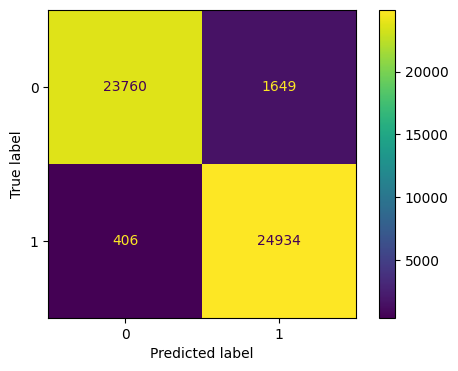

In [134]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot()

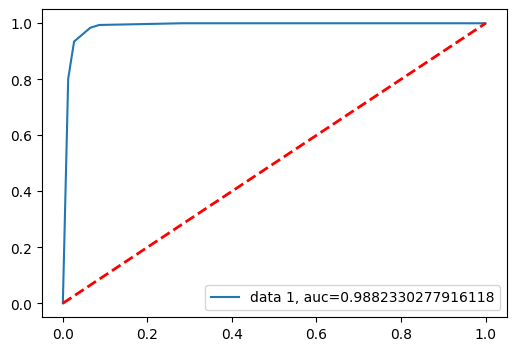

In [135]:
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (6.,4.)
plt.plot(fpr, tpr, label = 'data 1, auc='+str(auc))
plt.plot([0,1], [0,1], color = 'red', lw=2, linestyle='--')
plt.legend(loc=4)

#### Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
rf = RandomForestClassifier(max_depth=5, random_state=SEED, n_estimators = 100)

In [138]:
model = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print("Acurácia: ",metrics.accuracy_score(y_test, y_pred))
print("Precisão: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test, y_pred)) 
print("F1: ",metrics.f1_score(y_test, y_pred))

Acurácia:  0.9722950205915387
Precisão:  0.9787182974637971
Recall:  0.9655090765588004
F1:  0.9720688148118718


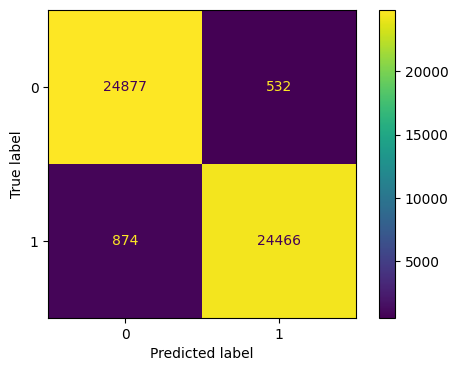

In [139]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot()

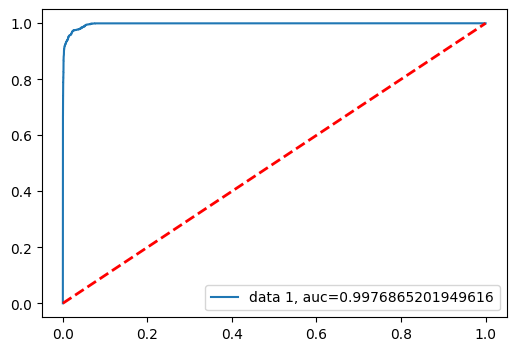

In [140]:
y_pred_proba = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (6.,4.)
plt.plot(fpr, tpr, label = 'data 1, auc='+str(auc))
plt.plot([0,1], [0,1], color = 'red', lw=2, linestyle='--')
plt.legend(loc=4)

##### Análise das métricas

In [141]:
classifiers = [
    LogisticRegression(max_iter=1000, random_state=SEED),
    DecisionTreeClassifier(max_depth=5, random_state=SEED),
    RandomForestClassifier(max_depth=5, random_state=SEED, n_estimators=100)
]

LogisticRegression
****Resultados****
Acurácia:  0.965437742615618
Precisão:  0.96745679403837
Recall:  0.9631807419100237
F1:  0.9653140325897801
DecisionTreeClassifier
****Resultados****
Acurácia:  0.9595065912628821
Precisão:  0.9379678742053192
Recall:  0.9839779005524862
F1:  0.9604221635883905
RandomForestClassifier
****Resultados****
Acurácia:  0.9722950205915387
Precisão:  0.9787182974637971
Recall:  0.9655090765588004
F1:  0.9720688148118718


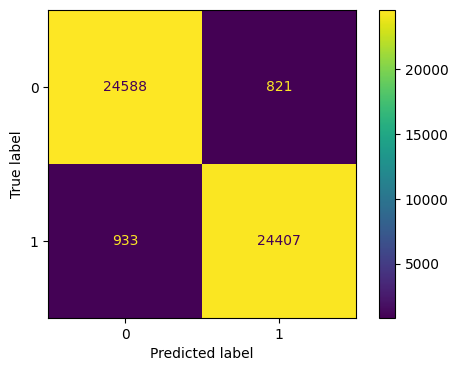

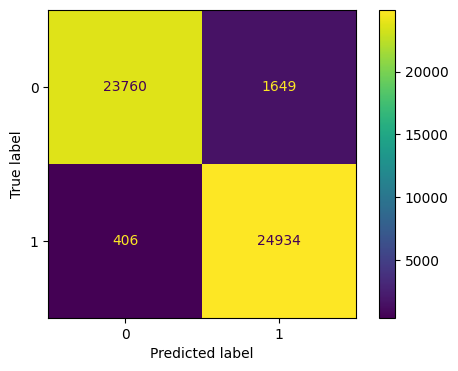

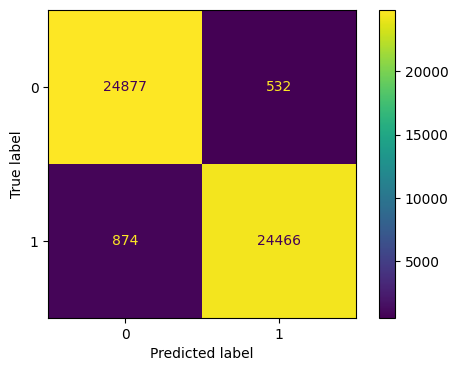

In [142]:
for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print("****Resultados****")
    y_pred = clf.predict(x_test)
    print("Acurácia: ",metrics.accuracy_score(y_test, y_pred))
    print("Precisão: ",metrics.precision_score(y_test, y_pred))
    print("Recall: ",metrics.recall_score(y_test, y_pred)) 
    print("F1: ",metrics.f1_score(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)
    disp.plot()

#### Melhoria do random forest

- melhorar o modelo [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) utilizando o método [RandomizedSearchCV](scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

In [143]:
## calibragem dos hiperparâmetros

n_estimators = np.arange(20, 200, step = 20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 10, step = 1))
min_samples_split = list(np.arange(2, 10, step = 2))
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [144]:
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [145]:
from sklearn.model_selection import RandomizedSearchCV

In [146]:
SEED = 70

rforest = RandomForestClassifier(random_state=SEED)

In [147]:
random_cv = RandomizedSearchCV(
    rforest, param_grid, n_iter = 5, cv =3, scoring = 'recall', n_jobs = -1, random_state= SEED
)

In [148]:
%%time

rcv = random_cv.fit(x, y)

C:\Users\P001571\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
6 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\P001571\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\P001571\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-

CPU times: total: 22.5 s
Wall time: 50.1 s


In [149]:
pd.DataFrame(rcv.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.092977      0.008168         0.000000        0.000000   
1       0.087503      0.013612         0.000000        0.000000   
2      15.001949      0.663593         0.249366        0.036017   
3      22.630098      0.586034         0.276251        0.026951   
4      19.578944      0.141170         0.413106        0.056774   

   param_n_estimators  param_min_samples_split  param_min_samples_leaf  \
0                 120                        4                       2   
1                 120                        4                       2   
2                  40                        8                       1   
3                 100                        8                       4   
4                 160                        6                       2   

  param_max_features  param_max_depth param_criterion  param_bootstrap  \
0               auto                9            gini            False   
1               auto                2            gini            False   
2               sqrt                7         entropy            False   
3               log2                9         entropy             True   
4               log2                2            gini            False   

                                              params  split0_test_score  \
0  {'n_estimators': 120, 'min_samples_split': 4, ...                NaN   
1  {'n_estimators': 120, 'min_samples_split': 4, ...                NaN   
2  {'n_estimators': 40, 'min_samples_split': 8, '...           0.981379   
3  {'n_estimators': 100, 'min_samples_split': 8, ...           0.992374   
4  {'n_estimators': 160, 'min_samples_split': 6, ...           0.914223   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0                NaN                NaN              NaN             NaN   
1                NaN                NaN              NaN             NaN   
2           0.999823           0.972245         0.984482        0.011470   
3           0.999438           0.988502         0.993438        0.004528   
4           0.929182           0.928913         0.924106        0.006989   

   rank_test_score  
0                4  
1                4  
2                2  
3                1  
4                3

In [150]:
rcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'entropy',
 'bootstrap': True}

In [153]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state=SEED)
rfn.fit(x_train, y_train)
y_pred = rfn.predict(x_test)

print("Acurácia: ",metrics.accuracy_score(y_test, y_pred))
print("Precisão: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test, y_pred)) 
print("F1: ",metrics.f1_score(y_test, y_pred))

Acurácia:  0.9910540109164713
Precisão:  0.9911193558572782
Recall:  0.9909629044988161
F1:  0.991041124003473


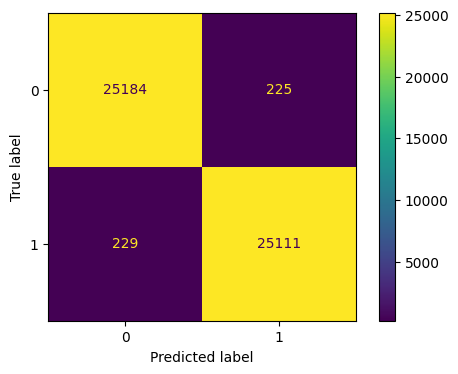

In [154]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot()